In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



In [47]:
# Load the dataset
df = pd.read_csv("housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [48]:
# Handle missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [49]:
# Split features and target
X = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
# Reset indices to align them
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [51]:
# Create the training DataFrame
train_df = X_train.join(y_train)

In [52]:
# Optional: Verify structure
print(train_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -117.96     33.69                17.0       2500.0           343.0   
1    -122.49     37.69                35.0       2576.0           443.0   
2    -120.00     36.70                33.0       1902.0           370.0   
3    -118.43     33.98                19.0       8324.0          1590.0   
4    -118.08     33.77                26.0       2461.0           562.0   

   population  households  median_income ocean_proximity  median_house_value  
0      1242.0       368.0         7.7313       <1H OCEAN            316700.0  
1      1273.0       433.0         4.7391      NEAR OCEAN            272800.0  
2      1168.0       358.0         2.6852          INLAND             70800.0  
3      2927.0      1538.0         7.5426       <1H OCEAN            351700.0  
4       971.0       544.0         2.1944       <1H OCEAN             87500.0  


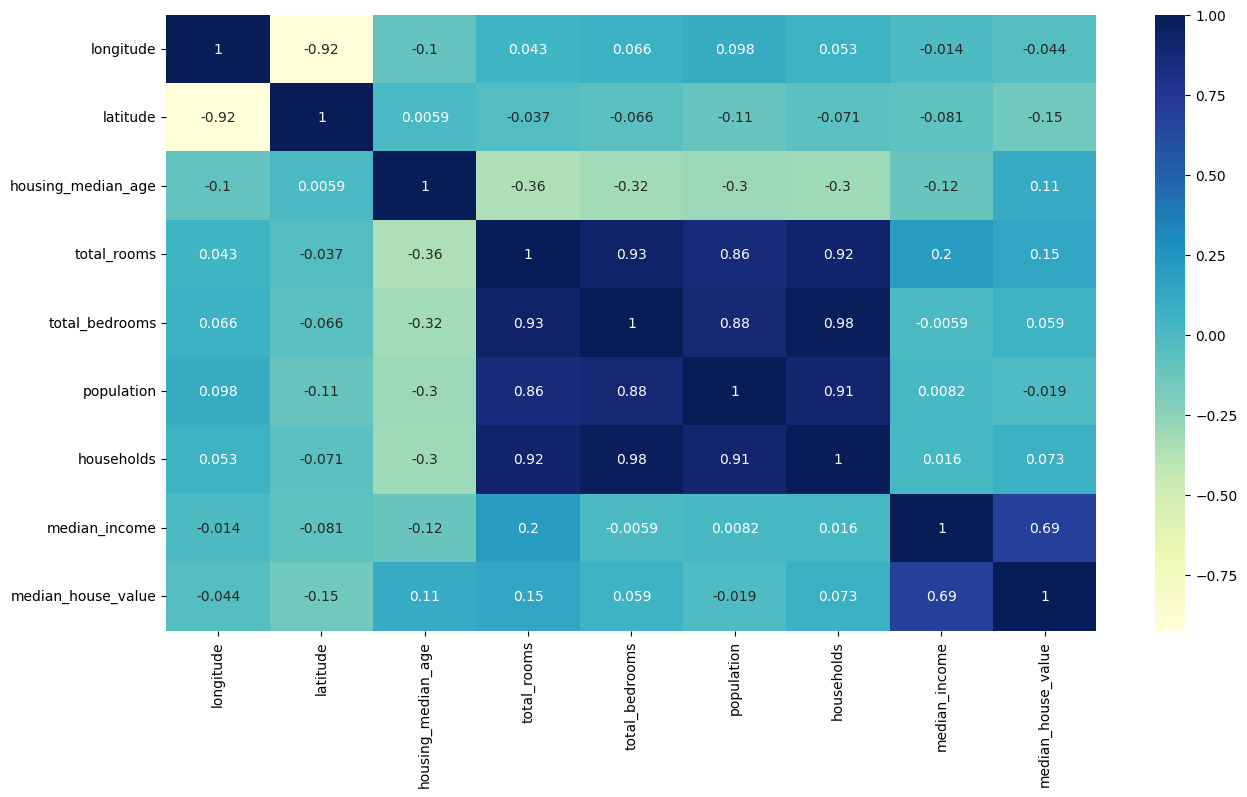

In [53]:
# Select only numeric columns
numeric_train_df = train_df.select_dtypes(include=[np.number])

# Compute correlation
correlation_matrix = numeric_train_df.corr()

# Heatmap visualization
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()


In [54]:
# Log transformation for selected columns
train_df["total_rooms"] = np.log(train_df["total_rooms"] + 1)
train_df["total_bedrooms"] = np.log(train_df["total_bedrooms"] + 1)
train_df["population"] = np.log(train_df["population"] + 1)
train_df["households"] = np.log(train_df["households"] + 1)

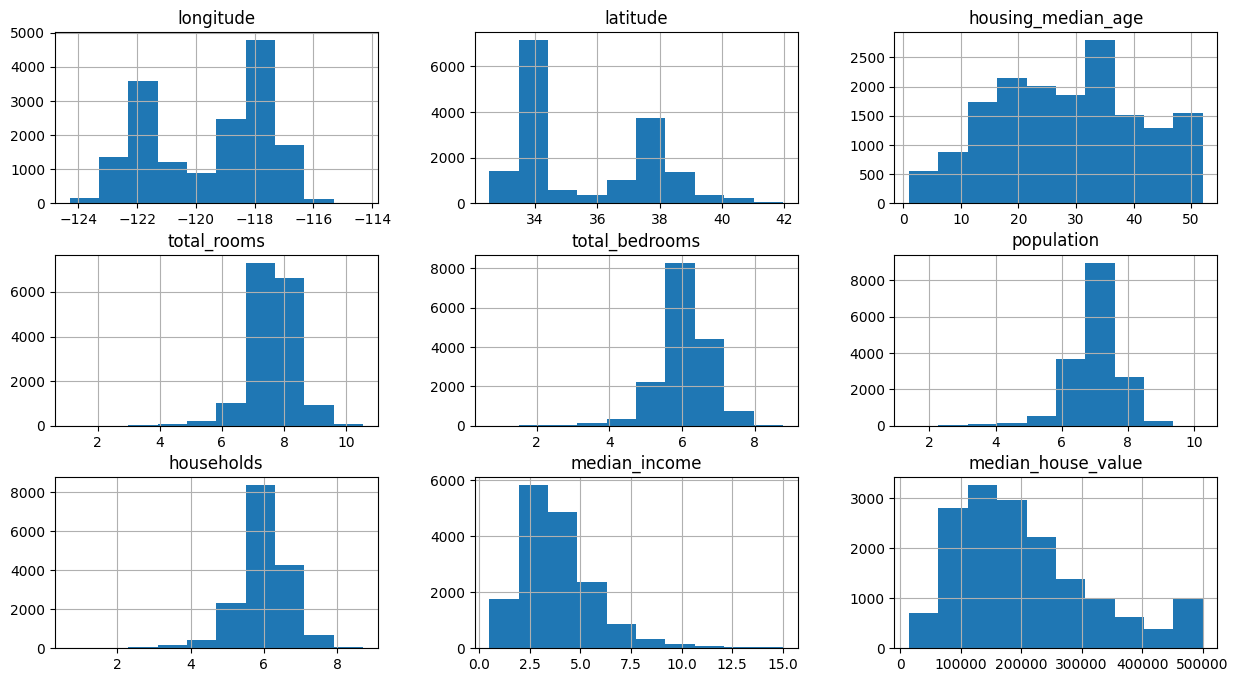

In [55]:
# Histograms for visual inspection
train_df.hist(figsize=(15, 8))
plt.show()

In [56]:
# Value counts for categorical column
print(train_df["ocean_proximity"].value_counts())

ocean_proximity
<1H OCEAN     7215
INLAND        5206
NEAR OCEAN    2101
NEAR BAY      1820
ISLAND           4
Name: count, dtype: int64


In [57]:
# One-hot encode 'ocean_proximity' and drop original column
train_df = train_df.join(pd.get_dummies(train_df["ocean_proximity"], drop_first=True))
train_df.drop(["ocean_proximity"], axis=1, inplace=True)

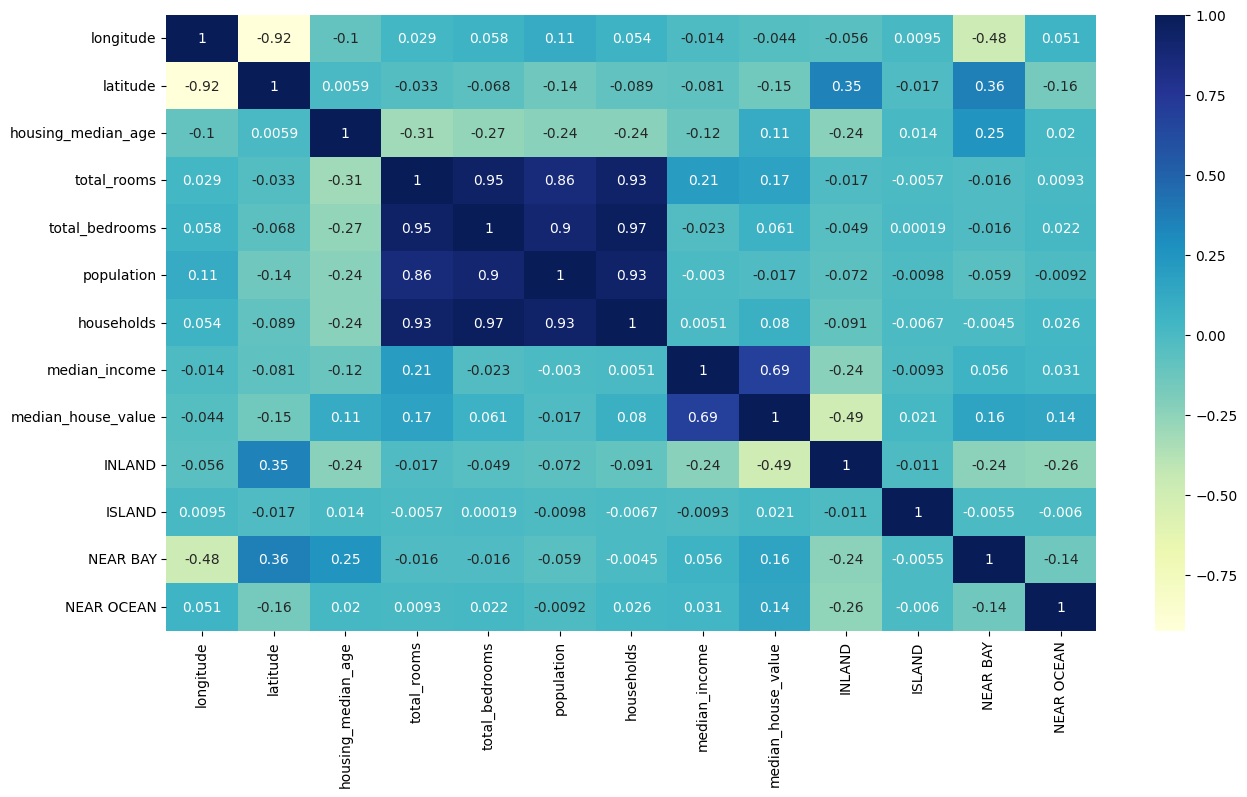

In [58]:
# Correlation matrix heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

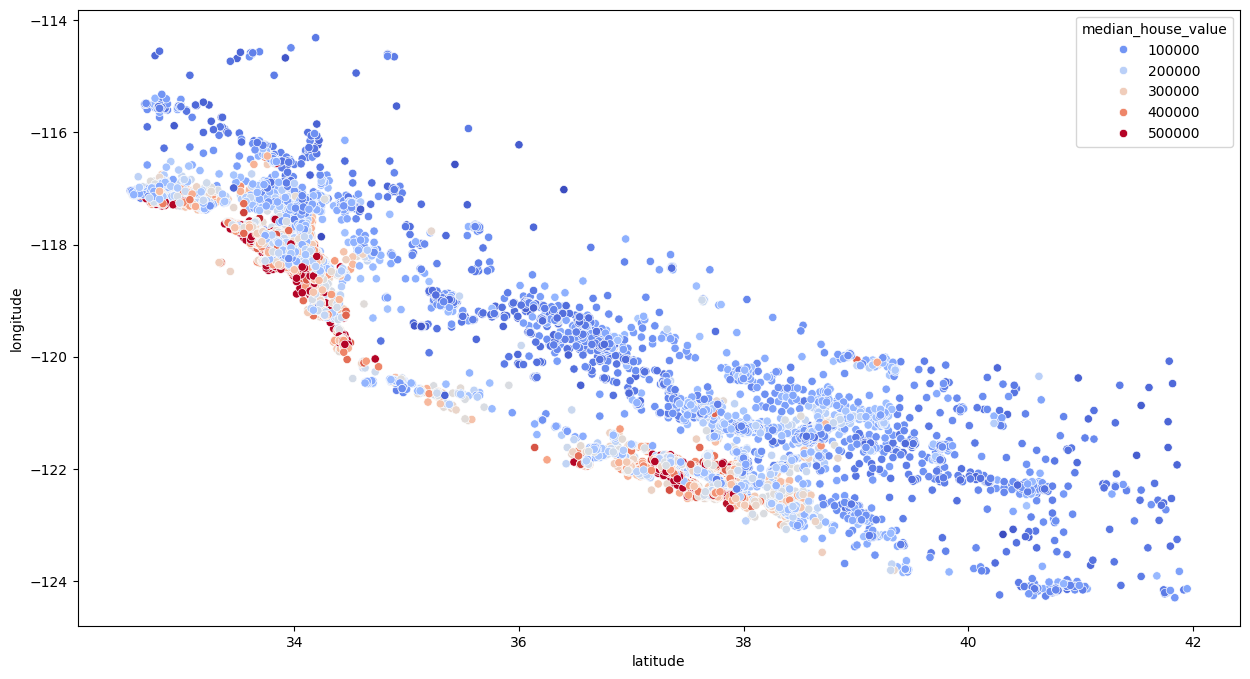

In [59]:
# Scatterplot of latitude vs longitude, hue by median_house_value
plt.figure(figsize=(15, 8))
sns.scatterplot(
    x="latitude",
    y="longitude",
    data=train_df,
    hue="median_house_value",
    palette="coolwarm"
)
plt.show()

In [60]:
# Add new features to train_df
train_df["bedroom_ratio"] = train_df["total_bedrooms"] / train_df["total_rooms"]
train_df["household_rooms"] = train_df["total_rooms"] / train_df["households"]

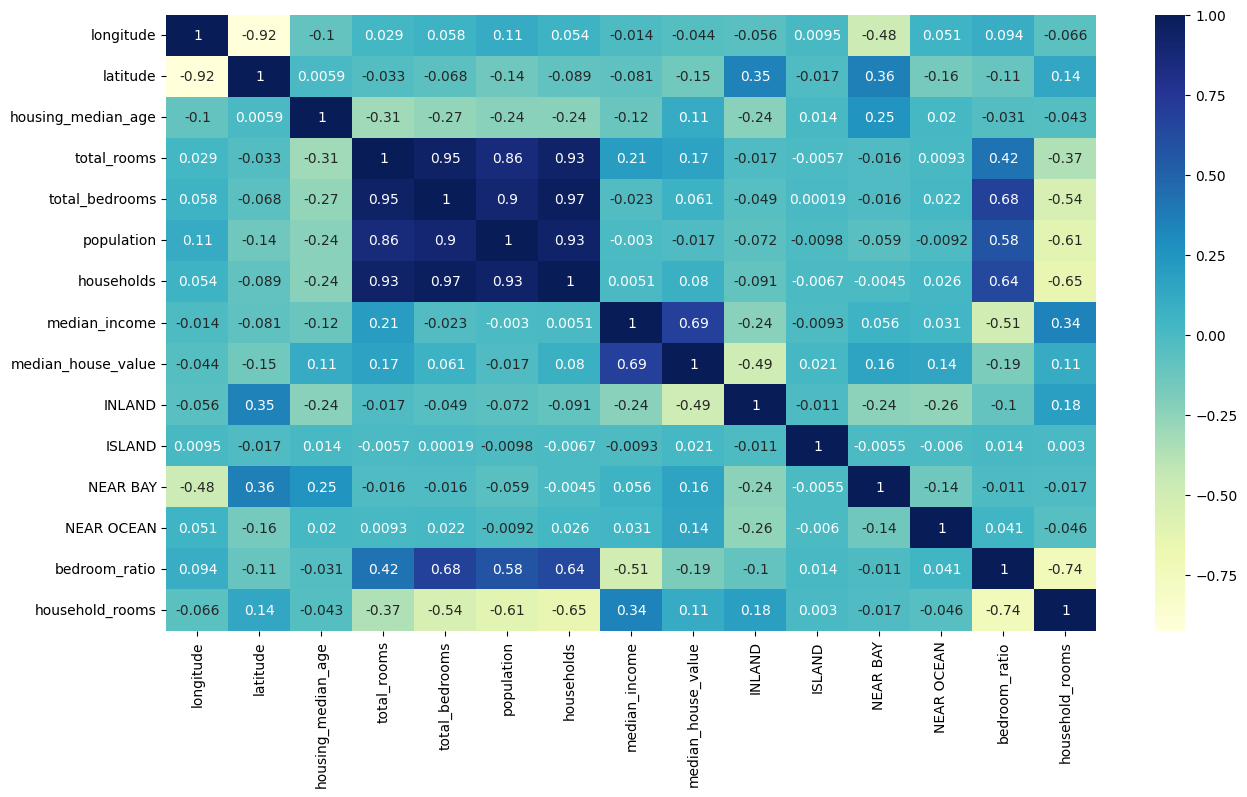

In [61]:
# Correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [62]:
# Prepare training data
X_train, y_train = train_df.drop(["median_house_value"], axis=1), train_df["median_house_value"]



In [63]:
# Linear Regression Model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [64]:
# Prepare test DataFrame
test_df = X_test.join(y_test).reset_index(drop=True)


In [65]:
# Apply log transformations to test data
test_df["total_rooms"] = np.log(test_df["total_rooms"] + 1)
test_df["total_bedrooms"] = np.log(test_df["total_bedrooms"] + 1)
test_df["population"] = np.log(test_df["population"] + 1)
test_df["households"] = np.log(test_df["households"] + 1)

In [66]:
# One-hot encode ocean_proximity and drop the original column
test_df = test_df.join(pd.get_dummies(test_df["ocean_proximity"], drop_first=True))
test_df.drop(["ocean_proximity"], axis=1, inplace=True)

In [67]:
# Add new features to test_df
test_df["bedroom_ratio"] = test_df["total_bedrooms"] / test_df["total_rooms"]
test_df["household_rooms"] = test_df["total_rooms"] / test_df["households"]

In [68]:
# Add new features to test_df
test_df["bedroom_ratio"] = test_df["total_bedrooms"] / test_df["total_rooms"]
test_df["household_rooms"] = test_df["total_rooms"] / test_df["households"]

In [69]:

# Split into features and target
X_test, y_test = test_df.drop(["median_house_value"], axis=1), test_df["median_house_value"]

In [70]:
# Display info about train and test DataFrames
print("Train DataFrame Info:")
train_df.info()
print("\nTest DataFrame Info:")
test_df.info()

Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16346 entries, 0 to 16345
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   median_house_value  16346 non-null  float64
 9   INLAND              16346 non-null  bool   
 10  ISLAND              16346 non-null  bool   
 11  NEAR BAY            16346 non-null  bool   
 12  NEAR OCEAN          16346 non-null  bool   
 13  bedroom_ratio       16346 non-null  float64
 14  household_rooms     16346 non-null  float64
dtypes: bool(4), float64(11)
memory 

In [71]:
# Linear Regression Model Score
linear_regression_score = reg.score(X_test, y_test)
print(f"Linear Regression Score: {linear_regression_score}")

Linear Regression Score: 0.657887007017481


In [72]:
# Random Forest Model
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
random_forest_score = forest.score(X_test, y_test)
print(f"Random Forest Score: {random_forest_score}")

Random Forest Score: 0.8035906511458261
